### Mushroom Classification

- Muhammad Fikri Hidayat 5311421103
- Nanda Aprilia Damayanti 5311421105
- Jupriansyah 5311421107

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import pickle as pkl

from tqdm import tqdm
from keras.callbacks import EarlyStopping 
from keras.callbacks import TensorBoard
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split #untuk memisahkan data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder #membuat data menjadi one-hot
from sklearn.preprocessing import StandardScaler
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\\Users\\mfikr\\Videos\\mushroom.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.shape #cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

(8124, 23)

In [7]:
df.isnull().sum() #make sure there's no null variables

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

C:\Users\mfikr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

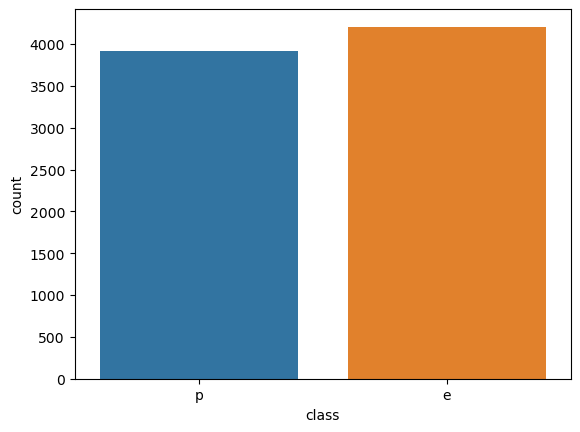

In [8]:
sns.countplot(df['class']) #plotting 'class' variable by count

<Figure size 1400x600 with 0 Axes>

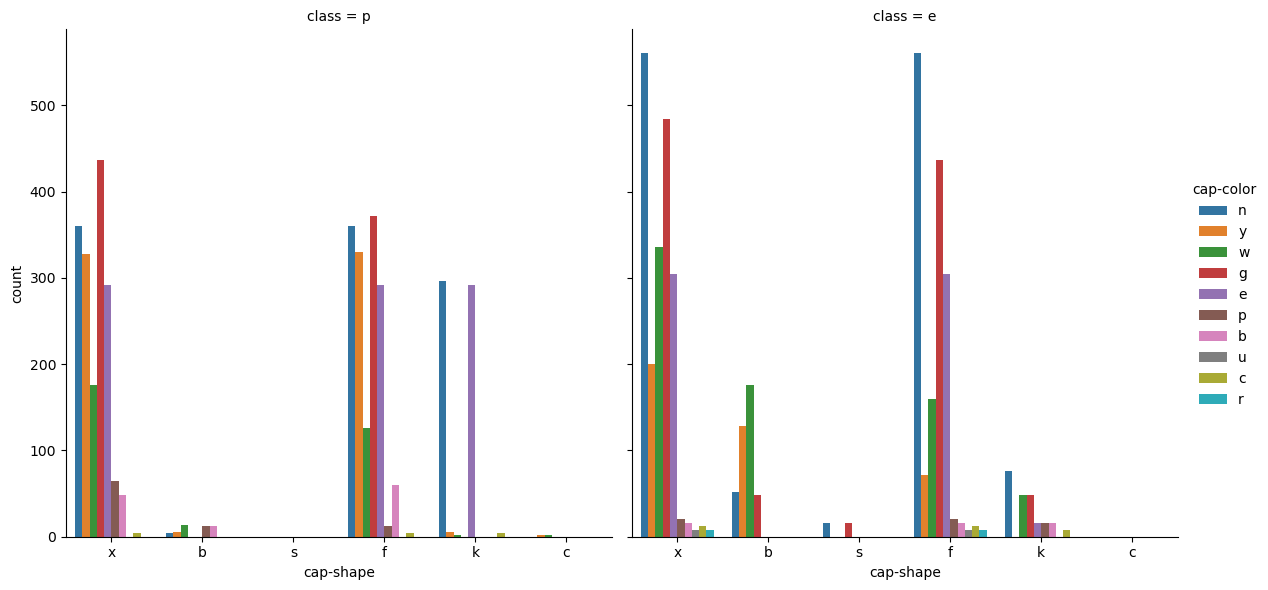

In [9]:
plt.figure(figsize = (14, 6)) #picture size, adjustable
g = sns.catplot(x = "cap-shape", hue = "cap-color", col = "class",
                data = df, kind ="count",
                height = 6, aspect = 1);

<Figure size 1400x600 with 0 Axes>

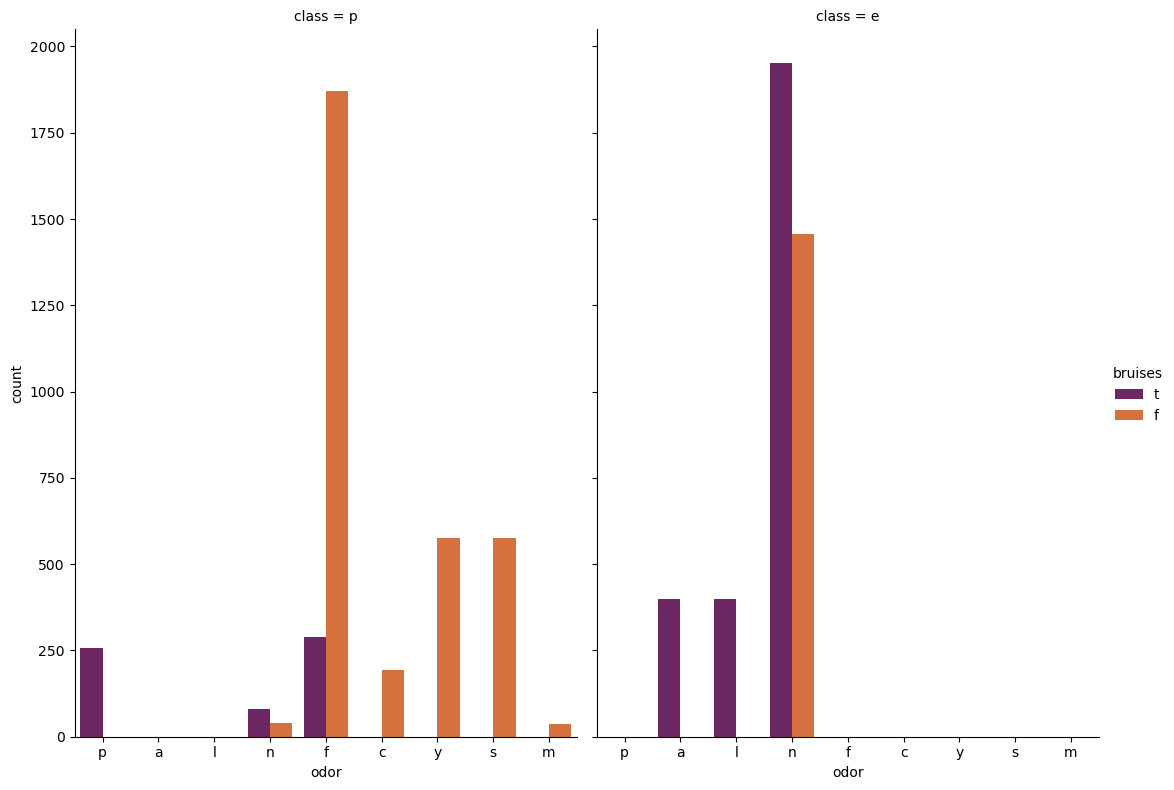

In [8]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = "odor", hue = "bruises", col = "class",
                data = df, kind = "count",
                height = 8, aspect = .7 , palette = 'inferno');

In [10]:
df = df[df['stalk-root'] != '?'] # membersihkan nilai ? pada kolom stalk-root
df = df.drop(['veil-type'], axis=1) # membuang kolom veil-type karena hanya 1 variabel (tidak berpengaruh)
df.isnull().any() # mengecek apa ada nilai yang kosong

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [21]:
features = df.iloc[:,1:]
features = pd.get_dummies(features)
target = df.iloc[:,0].replace({'p': 0, 'e': 1})
print('First 5 rows of new encoded feature columns:\n',features.head())
print('First 5 rows of new encoded target class of mushroom poisonous = 0 edible = 1:\n',target.head())
x = features.values
y = target.values

First 5 rows of new encoded feature columns:
    cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_n  population_s  population_v  population_y  

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=None, shuffle=True, stratify=None)

target_names = ['poisonous', 'edible']
print ('X_train Shape:', x_train.shape)
print ('X_test Shape:', x_test.shape)
print ('y_train Shape:', y_train.shape)
print ('y_test Shape:', y_test.shape)


X_train Shape: (3950, 97)
X_test Shape: (1694, 97)
y_train Shape: (3950,)
y_test Shape: (1694,)


In [17]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

def relu(x):
    return np.maximum(0, x)

def forward(x, w, activation):
    return activation(np.matmul(x, w))

def accuracy_fn(y, y_hat):
    return (np.where(y == y_hat)[0].size / y_hat.size)

def predict(x, y_hat, weights, activation):
    predictions = np.zeros(shape=(x.shape[0]))
    
    for idx in range(x.shape[0]):
        r1 = x[idx, :]
        for curr_weights in weights:
            r1 = forward(r1, curr_weights, activation)
        predictions[idx] = np.where(r1 == np.max(r1))[0][0]

    accuracy = accuracy_fn(predictions, y_hat)
    return accuracy, predictions
    
def fitness(x, y_hat, weights, activation):
    accuracy = np.empty(shape=(weights.shape[0]))
    for idx in range(weights.shape[0]):
        accuracy[idx], _ = predict(x, y_hat, weights[idx, :], activation)
    return accuracy

In [18]:
def mat_to_vector(mat_pop_weights):
    weights_vector = []
    for idx in range(mat_pop_weights.shape[0]):
        curr_vector = np.concatenate([layer.flatten() for layer in mat_pop_weights[idx]])
        weights_vector.append(curr_vector)
    return np.array(weights_vector)


def vector_to_mat(vector_weights, mat_pop_weights):
    mat_weights = []
    start = 0
    end = 0
    for idx in range(mat_pop_weights.shape[0]):
        for layer_idx in range(mat_pop_weights.shape[1]):
            end = start + mat_pop_weights[idx, layer_idx].size
            curr_vector = vector_weights[idx, start:end]
            mat_layer_weights = np.reshape(curr_vector, newshape=mat_pop_weights[idx, layer_idx].shape)
            mat_weights.append(mat_layer_weights)
            start = end
    return np.reshape(mat_weights, newshape=mat_pop_weights.shape)

In [19]:
def mating_pool(pop, fitness, num_parents):
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint32(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        
    return offspring


def mutation(offspring_crossover, mutation_percent):
    num_mutations = np.uint32((mutation_percent*offspring_crossover.shape[1]))
    mutation_indices = np.array(random.sample(range(0, offspring_crossover.shape[1]), num_mutations))
    
    for idx in range(offspring_crossover.shape[0]):
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, mutation_indices] = offspring_crossover[idx, mutation_indices] + random_value
    
    return offspring_crossover

In [20]:
solution_per_population = 8
num_parents_mating = 4
num_generations = 100
mutation_percent = 0.20

In [26]:
from sklearn.datasets import load_iris

# Example: Load the Iris dataset
iris = load_iris()
x_train = iris.data
y_train = iris.target

# Now you can access the shape attribute
input_shape = x_train.shape[1]
output_shape = len(np.unique(y_train))


In [30]:
initial_weights = []
for curr_sol in np.arange(0, solution_per_population):
    w1 = np.random.uniform(low=-0.1, high=0.1, size=(input_shape, 128))
    w2 = np.random.uniform(low=-0.1, high=0.1, size=(128, 64))
    w3 = np.random.uniform(low=-0.1, high=0.1, size=(64, output_shape))

    initial_weights.append([w1, w2, w3])
    
initial_weights = np.array(initial_weights, dtype=object)

In [28]:
weights_mat = np.array(initial_weights)
weights_vector = mat_to_vector(weights_mat)

best_outputs = []
accuracies = np.empty(shape=(num_generations))

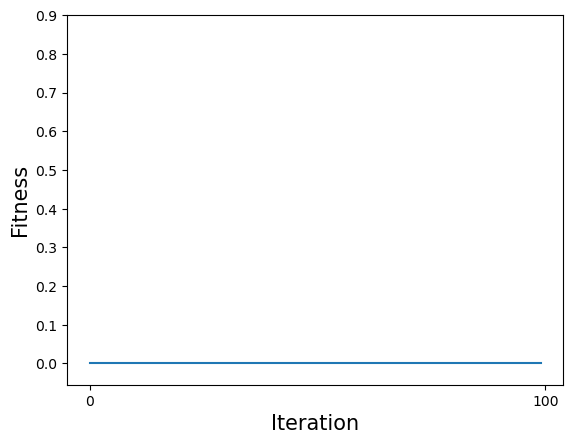

In [66]:
plt.plot(accuracies)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Fitness", fontsize=15)
plt.xticks(np.arange(0, num_generations+1, 100))
plt.yticks(np.arange(0, 1, 0.1))
plt.show()